In [7]:
import pandas as pd

# Read the coffee sales file
file_path = 'Coffee sales.csv'  # Update with the correct file path
coffee_sales_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
coffee_sales_df.head()

,txn_key,txn_id,txn_type,store_num,store_banner,business_date,detail_line_num,item_key,item_upc_key,prd_type,item_desc,status,actual_sale_price,regular_sale_price,sale_amt,sale_qty,sale_qty_uom,prepay_sale_amt,lottery_winning,discount_amt,discount_reasons,adj_sale_amt,target_line_num,merch_hierarchy,sales_restriction,selling_units,item_type_cd,entry_method,item_upc_cd,poscd_format,poscd_modifier_nm,item_scan_mod,grade_id,position_id,price_tier_cd,service_level_cd,time_tier_cd,online_sale_flag,outside_sale_flag,fueling_dispense_end_date_time,...,end_date_key,end_time,suspend_flag,training_mode_flag,tax_itemizer_mask,business_date_key,event_end_date,event_end_date_key,event_end_time,event_seq_id,event_start_date,event_start_date_key,event_start_time,till_id,fsaitem,prohibit_food_stamp_flag,cancellation_mode,uuid,price_override_approver_id,og_txn_id,og_business_date,og_detail_line_num,input_src,sales_destination_id,shift_num,cashier_id,overriding_cashier_id,vndr_model_version,vndr_nm,invoice_type,order_reference,override_price,override_price_reason,src_filenm,data_src,data_src_key,created_date,updated_date,created_by,updated_by
0,824b212984afa4b8eef3906cecd0e27e,1336392,SALE,926,RaceWay,2024-09-25,1,NaN,NaN,Item,16 OZ COFFEE,normal,1.79,1.79,3.58,2.0,NaN,NaN,0.0,NaN,NaN,3.58,NaN,103,NaN,1,NaN,button,2001,plu,NaN,0,NaN,NaN,NaN,NaN,NaN,N,no,NaN,...,20240926.0,2024-09-26T02:02:10.000Z,no,no,7.0,20240925,2024-09-25,20240925.0,2024-09-25T07:15:29.000Z,1.0,2024-09-25,20240925.0,2024-09-25T07:15:09.000Z,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAILY_LOAD,1.0,1,2.000000e+10,NaN,RPOS Export: 2020.4.500.772,"Radiant Systems, Inc.",NaN,NaN,NaN,NaN,abfss://radiant@dlsrtcorpdlprodeastus001.dfs.c...,Radiant,7,2024-09-28T00:32:31.598Z,2024-09-28T00:32:31.598Z,ENTD_TEAM,ENTD_TEAM
1,c4db4ccef91a8a498ec879d9e1bef00f,372574,SALE,6752,RaceWay,2024-09-25,2,NaN,NaN,Item,16 OZ COFFEE,normal,1.99,1.99,1.99,1.0,NaN,NaN,0.0,NaN,NaN,1.99,NaN,103,NaN,1,NaN,button,2001,plu,NaN,0,NaN,NaN,NaN,NaN,NaN,N,no,NaN,...,20240926.0,2024-09-26T02:02:05.000Z,no,no,3.0,20240925,2024-09-25,20240925.0,2024-09-25T17:53:20.000Z,1.0,2024-09-25,20240925.0,2024-09-25T17:53:04.000Z,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAILY_LOAD,1.0,1,NaN,NaN,RPOS Export: 2020.4.500.772,"Radiant Systems, Inc.",NaN,NaN,NaN,NaN,abfss://radiant@dlsrtcorpdlprodeastus001.dfs.c...,Radiant,7,2024-09-26T12:38:27.813Z,2024-09-26T12:38:27.813Z,ENTD_TEAM,ENTD_TEAM
2,1dc140e6564bcd2706343cf5267a6c74,1423388,SALE,6706,RaceWay,2024-09-25,1,NaN,NaN,Item,16 OZ COFFEE,normal,1.69,1.69,3.38,2.0,NaN,NaN,0.0,NaN,NaN,3.38,NaN,103,NaN,1,NaN,scan,35700918164,upcA,NaN,0,NaN,NaN,NaN,NaN,NaN,N,no,NaN,...,20240926.0,2024-09-26T02:01:36.000Z,no,no,7.0,20240925,2024-09-25,20240925.0,2024-09-25T07:55:06.000Z,1.0,2024-09-25,20240925.0,2024-09-25T07:54:29.000Z,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAILY_LOAD,1.0,2,NaN,NaN,RPOS Export: 2020.4.500.772,"Radiant Systems, Inc.",NaN,NaN,NaN,NaN,abfss://radiant@dlsrtcorpdlprodeastus001.dfs.c...,Radiant,7,2024-09-26T12:38:27.813Z,2024-09-26T12:38:27.813Z,ENTD_TEAM,ENTD_TEAM
3,033dbf3d0819b1e5c996bf16e5c27259,583446,SALE,6747,RaceWay,2024-09-25,1,NaN,NaN,Item,16 OZ COFFEE,normal,1.79,1.79,1.79,1.0,NaN,NaN,0.0,NaN,NaN,1.79,NaN,103,NaN,1,NaN,button,2001,plu,NaN,0,NaN,NaN,NaN,NaN,NaN,N,no,NaN,...,20240926.0,2024-09-26T02:02:09.000Z,no,no,23.0,20240925,2024-09-25,20240925.0,2024-09-25T05:57:13.000Z,1.0,2024-09-25,20240925.0,2024-09-25T05:56:51.000Z,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAILY_LOAD,1.0,1,1.000000e+10,NaN,RPOS Export: 2020.4.500.772,"Radiant Systems, Inc.",NaN,NaN,NaN,NaN,abfss://radiant@dlsrtcorpdlprodeastus001.dfs.c...,Radiant,7,2024-09-26T12:38:27.813Z,2024-09-26T12:38:27.813Z,ENTD_TEAM,ENTD_TEAM
4,229b93f3ac286ca95e3ea5d6f4fb031f,1336203,SALE,926,RaceWay,2024-09-25,1,NaN,NaN,Item,16 OZ COFFEE,normal,1.79,1.79,1.79,1.0,NaN,NaN,0.0,NaN,NaN,1.79,NaN,103,NaN,1,NaN,button,2001,plu,NaN,0,NaN,NaN,NaN,NaN,NaN,N,no,NaN,...,20240926.0,2024-09-26T02:02:10.000Z,no,no,7.0,20240925,2024-09-25,20

In [8]:
# Remove the unwanted columns from the sales dataframe
columns_to_keep = ['txn_id', 'store_num', 'business_date', 'item_desc', 'sale_amt']
sales = coffee_sales_df[columns_to_keep]

# Display the first few rows of the updated dataframe
sales.head()

,txn_id,store_num,business_date,item_desc,sale_amt
0,1336392,926,2024-09-25,16 OZ COFFEE,3.58
1,372574,6752,2024-09-25,16 OZ COFFEE,1.99
2,1423388,6706,2024-09-25,16 OZ COFFEE,3.38
3,583446,6747,2024-09-25,16 OZ COFFEE,1.79
4,1336203,926,2024-09-25,16 OZ COFFEE,1.79


In [9]:
max_business_date = sales['business_date'].max()
min_business_date = sales['business_date'].min()

max_business_date, min_business_date

('2024-09-30', '2023-09-01')

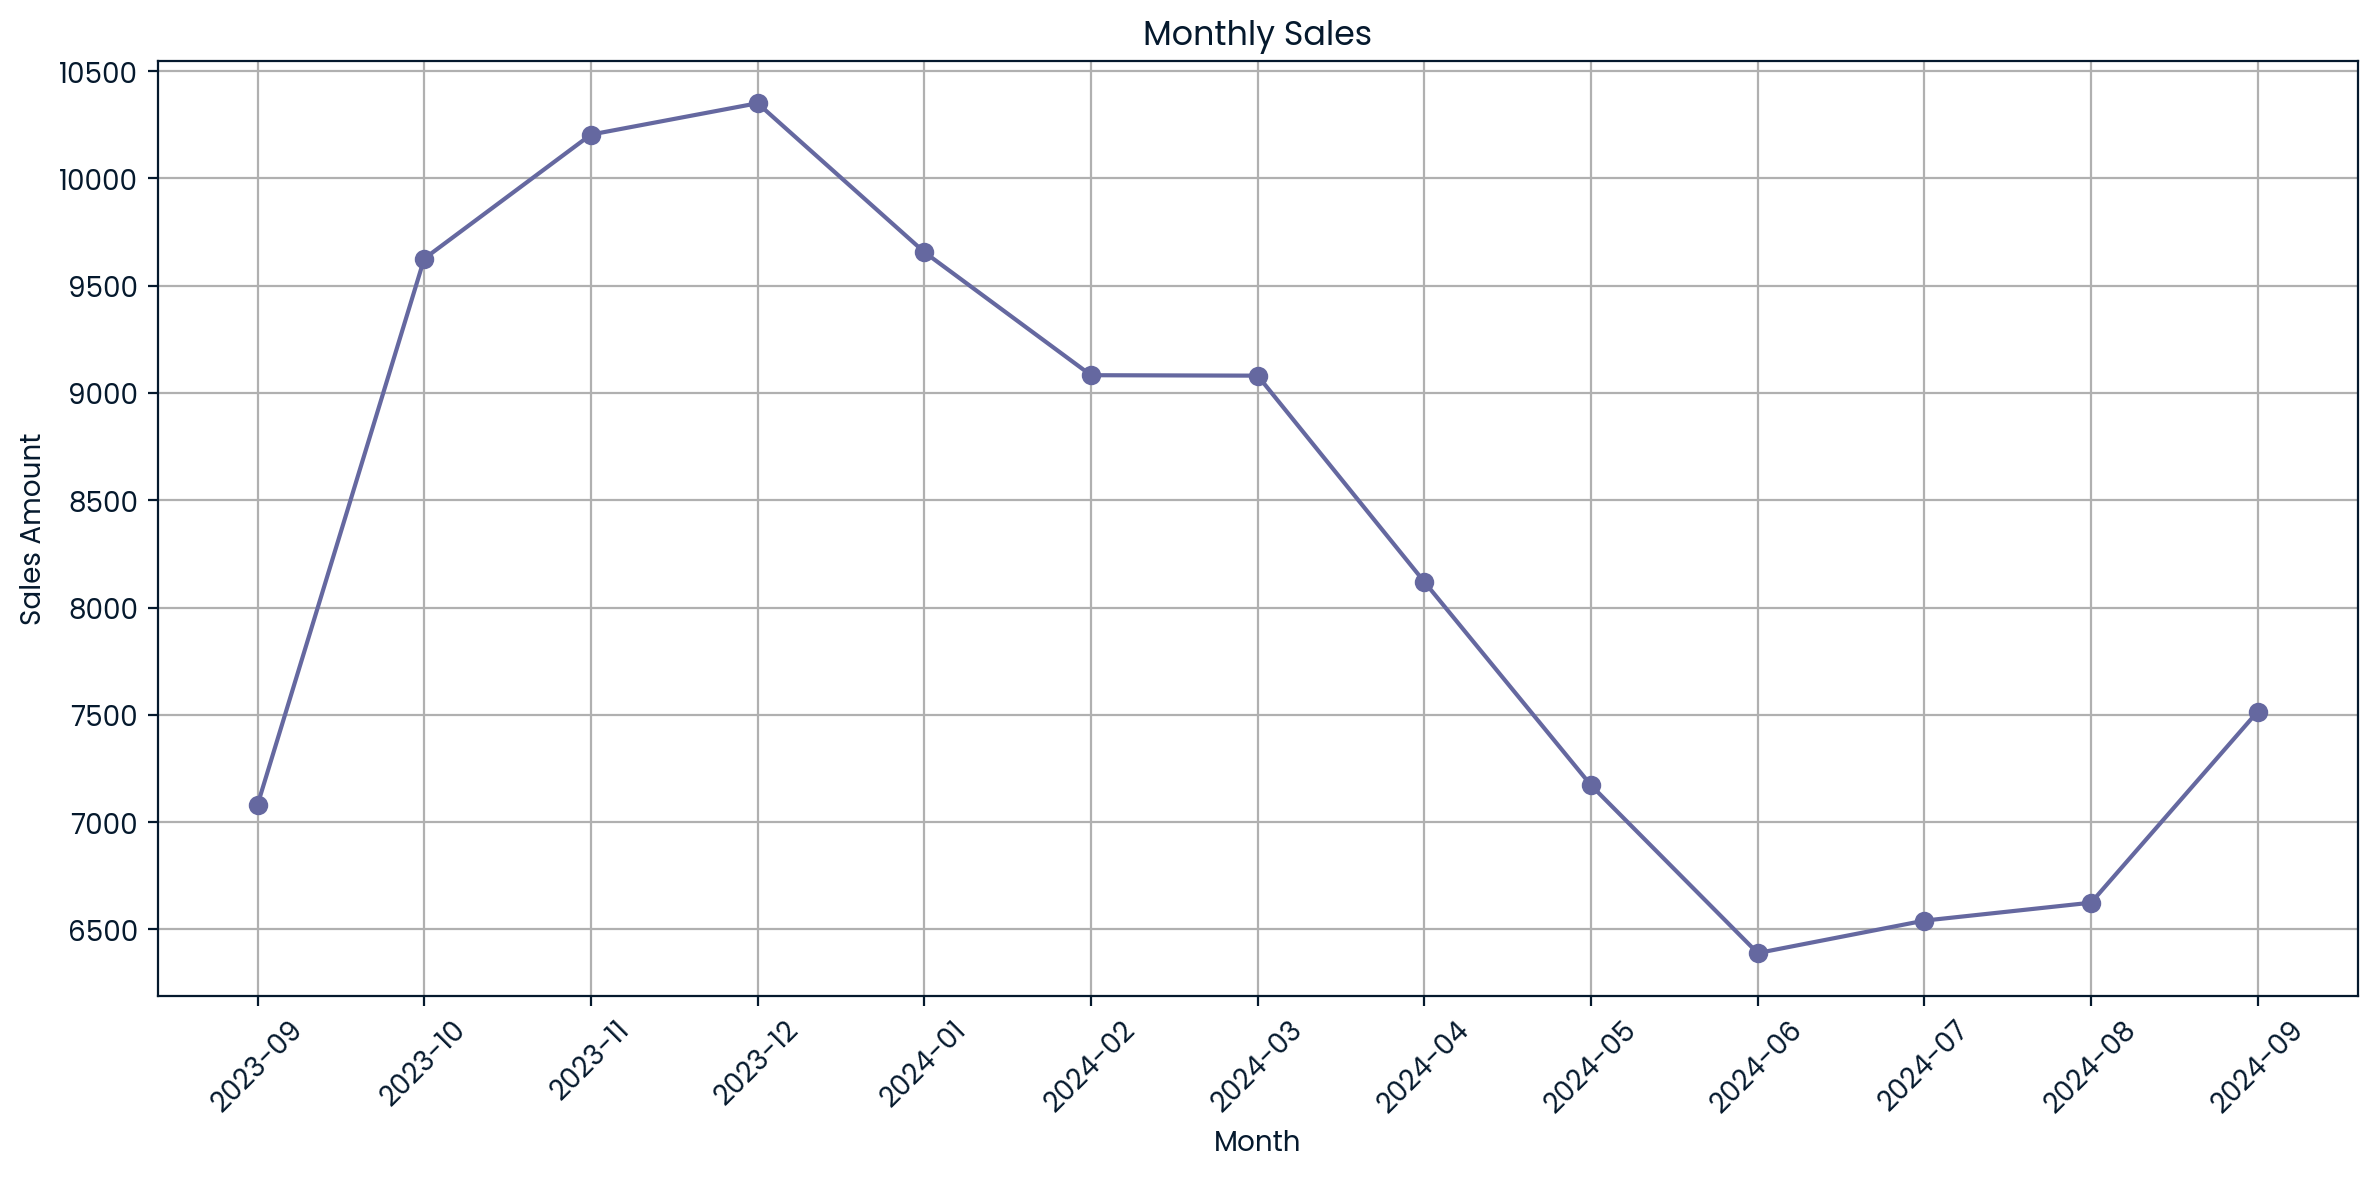

In [10]:
import matplotlib.pyplot as plt

# Convert 'business_date' to datetime format
sales['business_date'] = pd.to_datetime(sales['business_date'])

# Extract year and month from 'business_date'
sales['year_month'] = sales['business_date'].dt.to_period('M')

# Group by year and month and sum the sales amount
monthly_sales = sales.groupby('year_month')['sale_amt'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['sale_amt'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

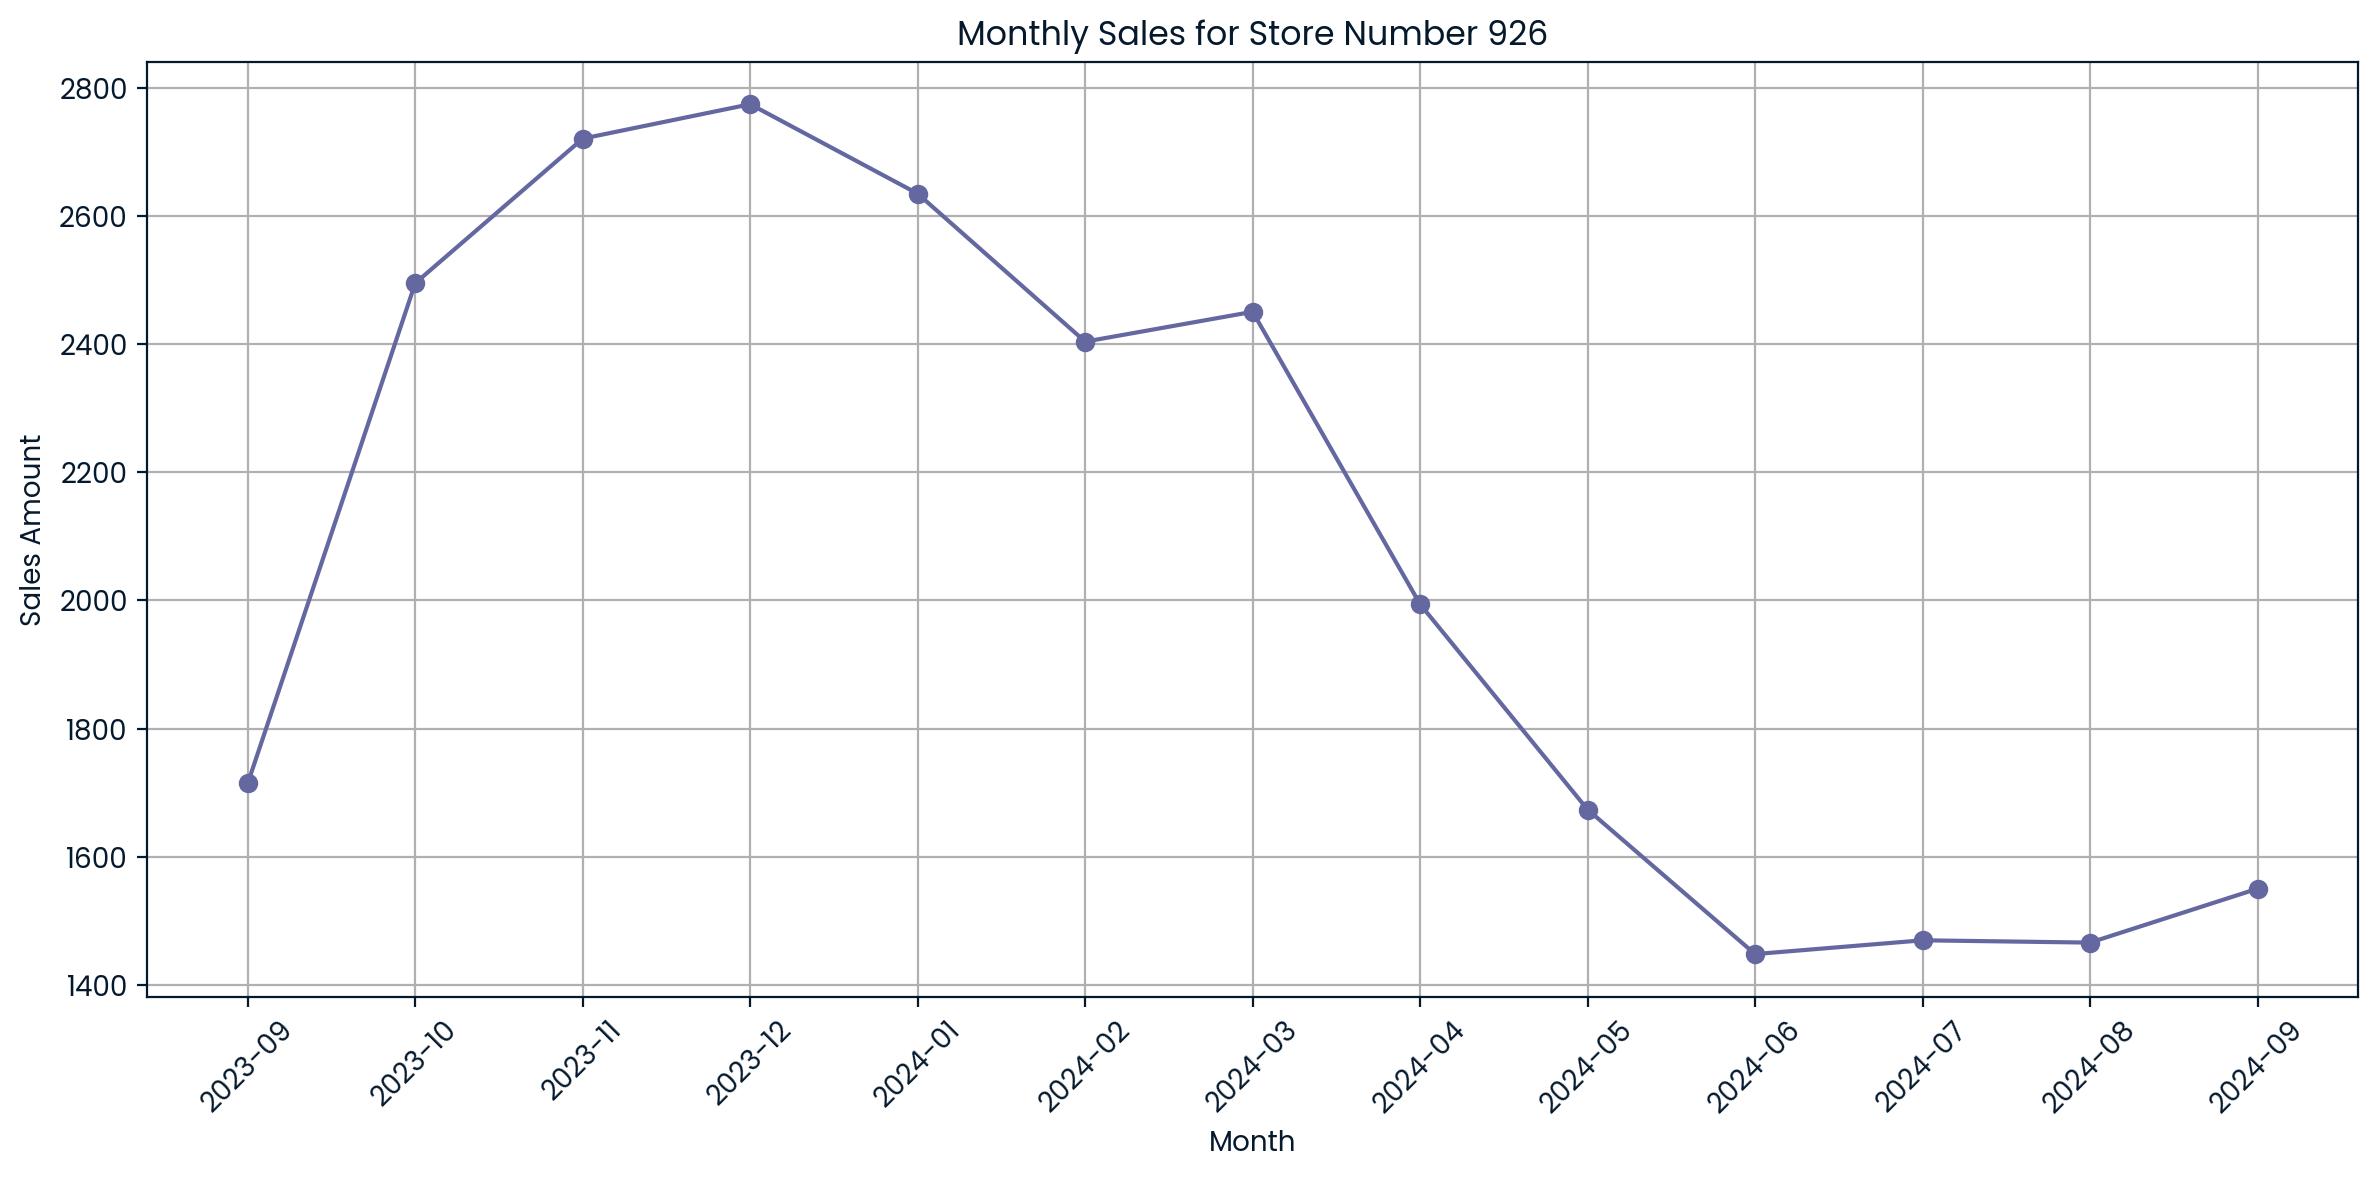

In [11]:
# Find the store with the highest total sales amount
highest_sales_store = sales.groupby('store_num')['sale_amt'].sum().idxmax()

# Filter the sales data for the highest sales store
highest_sales_store_data = sales[sales['store_num'] == highest_sales_store]

# Group by year and month and sum the sales amount for the highest sales store
monthly_sales_highest_store = highest_sales_store_data.groupby('year_month')['sale_amt'].sum().reset_index()

# Plot the monthly sales for the highest sales store
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_highest_store['year_month'].astype(str), monthly_sales_highest_store['sale_amt'], marker='o')
plt.title(f'Monthly Sales for Store Number {highest_sales_store}')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



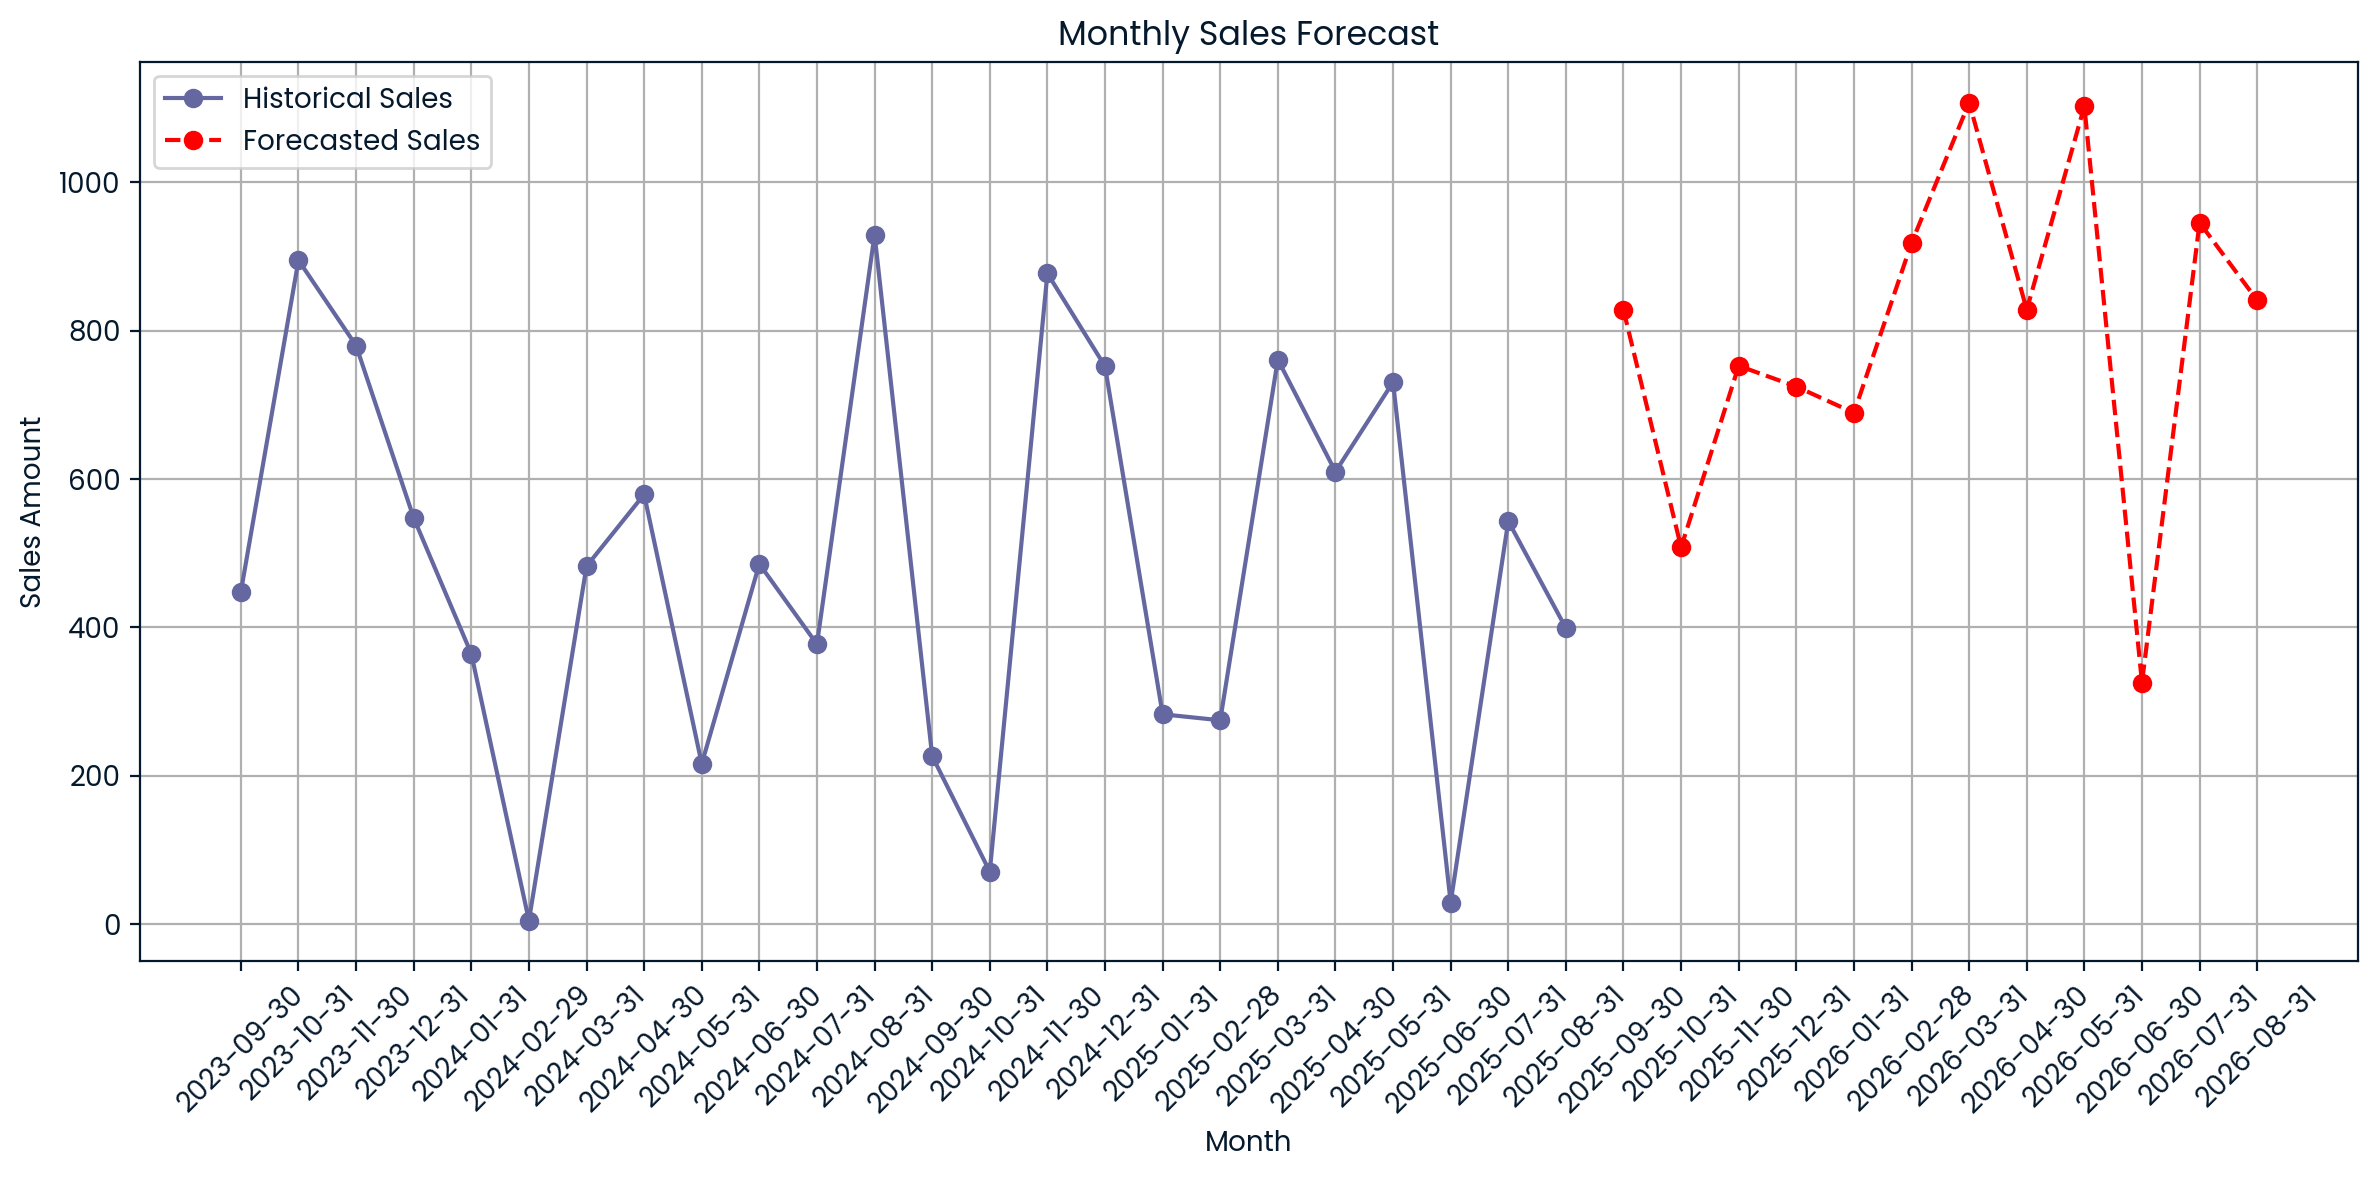

,year_month,sale_amt
0,2025-09-30,827.841333
1,2025-10-31,507.847339
2,2025-11-30,752.561210
3,2025-12-31,724.535359
4,2026-01-31,689.191365
5,2026-02-28,918.034597
6,2026-03-31,1107.370863
7,2026-04-30,828.118024
8,2026-05-31,1102.370223
9,2026-06-30,325.609882


In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'year_month': pd.date_range(start='2023-09-01', periods=24, freq='M'),
    'sale_amt': np.random.rand(24) * 1000
}
monthly_sales = pd.DataFrame(data)

# Prepare the data for time series forecasting
monthly_sales.set_index('year_month', inplace=True)

# Check if there are at least 24 data points (2 full seasonal cycles for monthly data)
if len(monthly_sales) < 24:
    raise ValueError("Not enough data to compute initial seasonals. Need at least 24 data points.")

# Fit the model
model = ExponentialSmoothing(monthly_sales['sale_amt'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 months
forecast = fit.forecast(12)

# Create a new dataframe for the forecasted values
# forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
# forecast_df = pd.DataFrame({'year_month': forecast_index, 'sale_amt': forecast.values})

# Plot the historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales['sale_amt'], marker='o', label='Historical Sales')
plt.plot(forecast_df['year_month'].astype(str), forecast_df['sale_amt'], marker='o', linestyle='--', color='red', label='Forecasted Sales')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the forecasted values
forecast_df

Mean Squared Error: 6477.171130481344


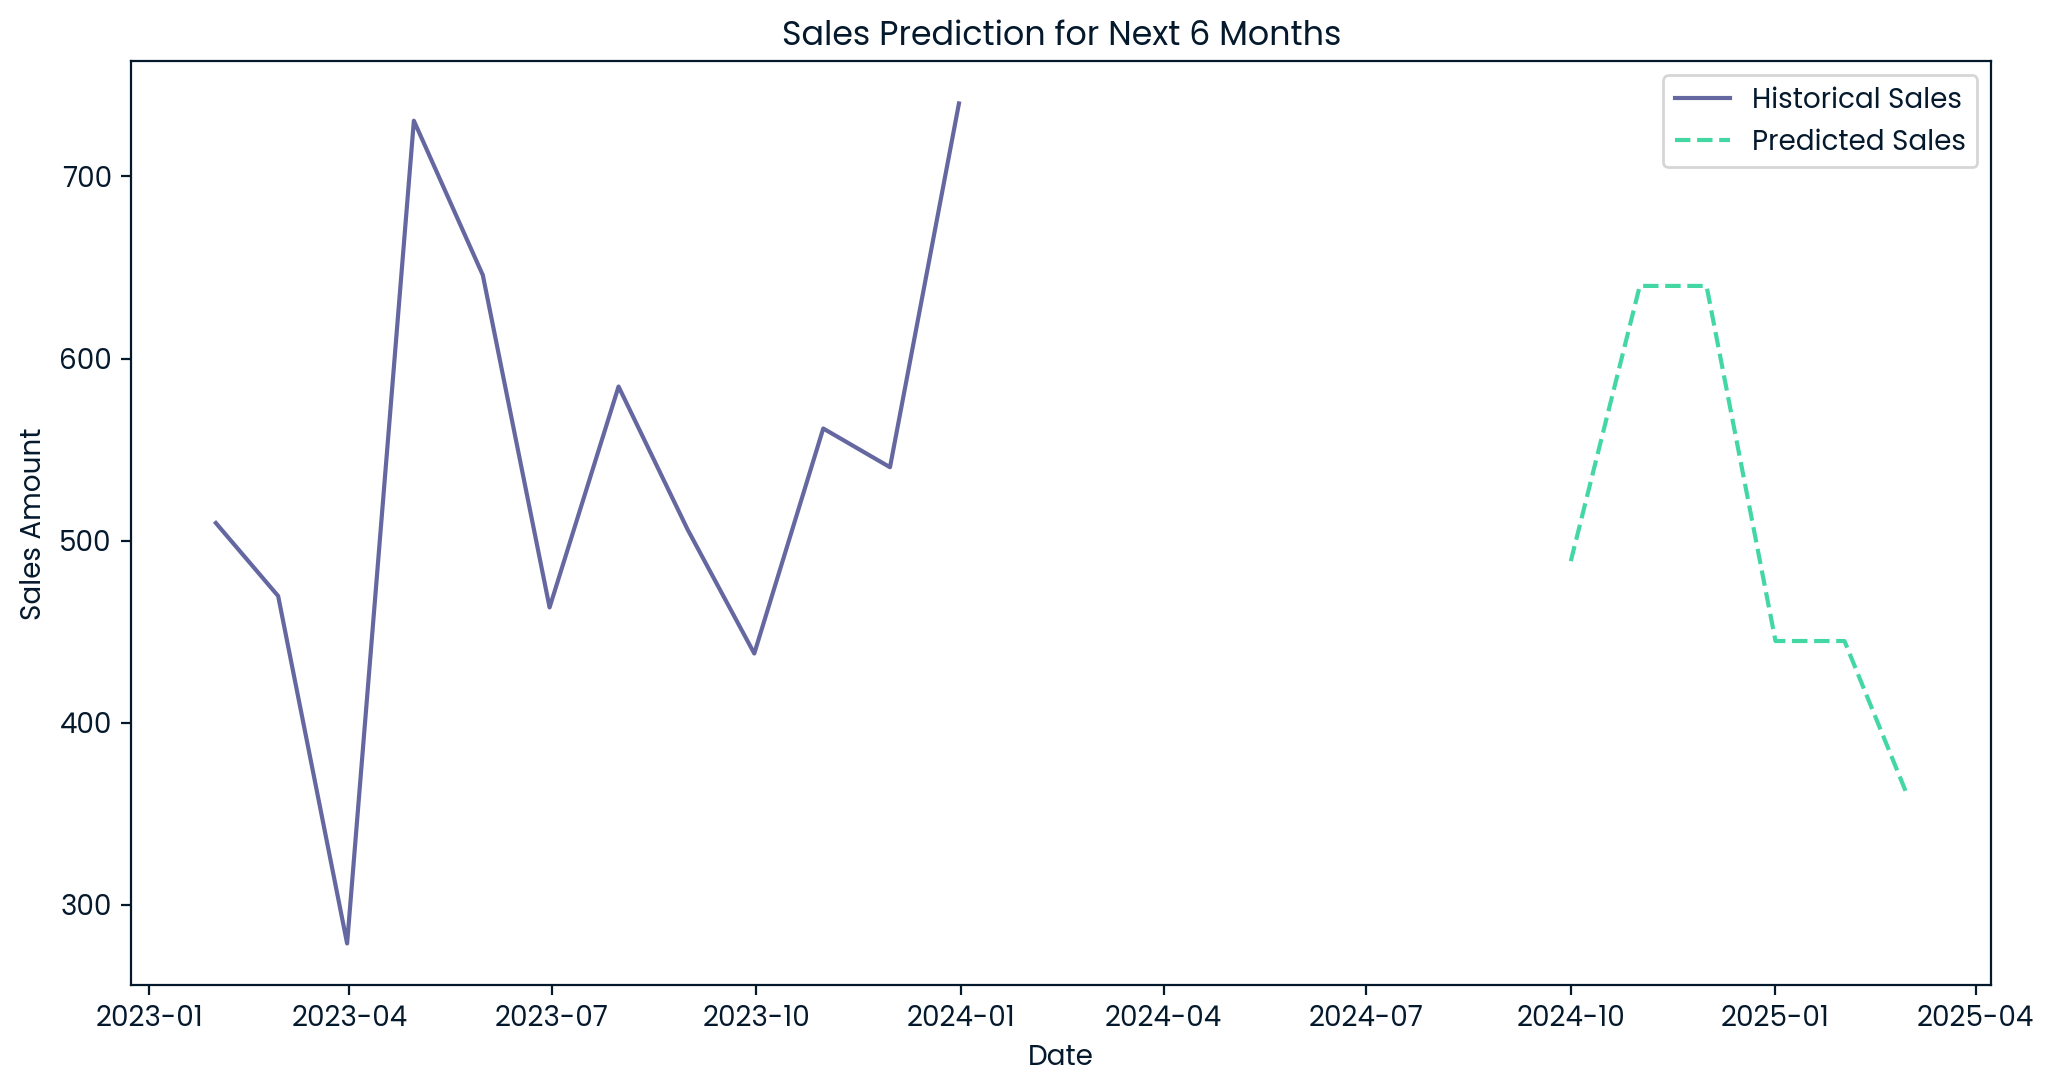

,year_month,year,month,predicted_sale_amt
0,2024-10-01,2024,10,488.713965
1,2024-11-01,2024,11,639.893920
2,2024-12-01,2024,12,639.893920
3,2025-01-01,2025,1,444.837920
4,2025-02-01,2025,2,444.837920
5,2025-03-01,2025,3,360.864908


In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ensure 'year_month' is in datetime format
forecast_df['year_month'] = pd.to_datetime(forecast_df['year_month'])

# Extract features
forecast_df['month'] = forecast_df['year_month'].dt.month
forecast_df['year'] = forecast_df['year_month'].dt.year

# Prepare the data for modeling
X = forecast_df[['year', 'month']]
y = forecast_df['sale_amt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict the next 6 months from Oct 2024 to Mar 2025
future_dates = pd.date_range(start='2024-10-01', end='2025-03-01', freq='MS')

future_df = pd.DataFrame({
    'year_month': future_dates,
    'year': future_dates.year,
    'month': future_dates.month
})

future_X = future_df[['year', 'month']]
future_df['predicted_sale_amt'] = model.predict(future_X)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['year_month'], forecast_df['sale_amt'], label='Historical Sales')
plt.plot(future_df['year_month'], future_df['predicted_sale_amt'], label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Prediction for Next 6 Months')
plt.legend()
plt.show()

# Display the future predictions
future_df